In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import metpy.calc as mpcalc
from metpy.cbook import example_data
import matplotlib.path as mplPath
from metpy.units import units
import numpy as np
import xarray as xr

In [9]:
ds = xr.open_dataset('C:/Diabatic_data/extra3/advection/adiabtic_expansion1_1961-2021_mon.nc') #horizontal advection
ds.data_vars

Data variables:
    adia_expan  (time, plev, lat, lon) float32 ...

In [10]:
print(ds. adia_expan.units)

kelvin/second


In [11]:
#seting coordinate system for temp
ds.coords['lon']=(ds.coords['lon']+180)%360-180
ds=ds.sortby(ds.lon)
#ds.data_vars

In [12]:
ds1 = ds.sel(lon=slice(-50, 100), lat=slice(40,-50))  ## Slice to Africa
ds1.data_vars

Data variables:
    adia_expan  (time, plev, lat, lon) float32 ...

In [13]:
ds2 = ds1.sel(plev=95000) #selecting to the pressure level
ds2.data_vars

Data variables:
    adia_expan  (time, lat, lon) float32 ...

In [14]:
dh = ds2.sel(time=slice("1961-01", "2021-12"))
dh.data_vars
print(dh.adia_expan.units)

kelvin/second


In [27]:
dh1=dh.adia_expan.metpy.convert_units('degC / day')
#dh1

In [28]:
## define data as xarray dataset and save as netcdf
lon=dh['lon'].values
lat=dh['lat'].values
time=dh['time'].values


var2=xr.DataArray(data=dh.adia_expan.metpy.convert_units('degC / day'), dims=('time','lat', 'lon'), coords={'time':time,'lat':lat, 'lon':lon}, 
                     attrs=dict(description="adiabatic expansion or compression due to vertical motion",),).rename('adia_expan')

## save data as netcdf
var2.to_netcdf('C:/Diabatic_data/extra3/advection/adiabtic_expansion2_1961-2021_mon_950hpa_Af.nc', mode='w')
#var2.var

In [31]:
var3=var2.mean('time')

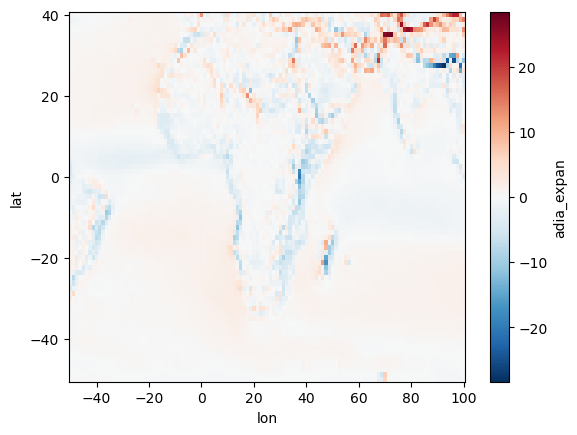

In [32]:
var3.plot()